In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("twitter_model.csv",index_col=0)
sales=pd.read_csv("sales_model.csv", index_col=0)

In [3]:
df.reset_index(inplace=True)

In [4]:
#STOPWORDS - DELETE STOPWORDS
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import re

In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
stop_words = stopwords.words('english')
stop_words2 = list(text.ENGLISH_STOP_WORDS)
add_stop_words = ['amp'] # amp is a nosense frequent word
for sw in (stop_words + stop_words2):
    # consider all the stopwords without "'". For example "cant" instead of "can't"
    text = re.sub('\'', '', sw)
    add_stop_words.append(text)
stop_words = set(stop_words + stop_words2 + add_stop_words)
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santoloc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\santoloc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\santoloc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\santoloc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'ain',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'amp',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'aren',
 "aren't",
 'arent',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'con',
 'could',
 'couldn',
 "couldn't",
 'couldnt',
 'cry',
 'd',
 'de',
 'describe',
 'detail',
 'did',
 'didn',
 "didn't",
 'didnt',
 'do',
 'does',
 'doesn',
 "doesn't",
 'doesnt',
 'doing',
 'don',
 "don't",
 'done',
 'dont',
 'down',
 'due',
 'during',
 'each',
 'eg',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',


In [6]:
#CLEAN DATA
import re
import string
def clean_text_1(text):
    # Lowercase
    text = text.lower()
    # Remove special text in brackets ([chorus],[guitar],etc)
    text = re.sub('\[.*?\]', '', text)
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)   
    # Remove quotes
    text = re.sub('[‘’“”…]', '', text)
    # Remove new line \n 
    text = re.sub('\n', ' ', text)
    # Remove stop_word
    # stop_words = stopwords.words('english')
    words = word_tokenize(text)
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    # Remove characters that are not letters or spaces
    new_text = re.sub('[^A-Za-z\s]+', '', new_text) 
    # Remove words with 1 char
    new_text = re.sub('\b[A-Za-z]{1}\b', '', new_text) 
    return new_text
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk import word_tokenize, pos_tag
wnl = WordNetLemmatizer()
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
data_clean = df.copy()
data_clean['text'] = data_clean.text.apply(clean_text_1)
data_clean

,ID_SALES,text
0,HD1927A,lastly company thats trying love flying nice ...
1,ST4244A,states playing hunt destinationdragons ticket...
2,HD108A,pleasant flight london charlotte fantastic am...
3,HD4335A,tried make transaction offer price id tried p...
4,HN416A,seriously cats dead im going pissedvery thank...
...,...,...
12701,HC3660A,friend told able use credit airline flights told
12702,HD3916A,bit steamed conjunction wmy new wait sat boug...
12703,HD2061T,nyc flight delayed miss connection sacramento...
12704,HS4684T,verify wheelchair assistance requested flight


In [7]:
#LEMMATIZER

from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatize_tag(text):
    lemma=[]
    for i,j in pos_tag(word_tokenize(text)) :
        p=j[0].lower()
        if p in ['j','n','v']:
            if p == 'j':
                p = 'a'
            lemma.append(wnl.lemmatize(i,p))
        else :
            lemma.append(wnl.lemmatize(i))    
    return ' '.join(lemma)

In [8]:
#apply lemmatizer
data_clean_OK = data_clean.copy()
data_clean_OK.text = data_clean.text.apply(lemmatize_tag)

In [9]:
data_clean_OK

,ID_SALES,text
0,HD1927A,lastly company thats try love fly nice persona...
1,ST4244A,state play hunt destinationdragons ticket left...
2,HD108A,pleasant flight london charlotte fantastic ama...
3,HD4335A,tried make transaction offer price id try purc...
4,HN416A,seriously cat dead im go pissedvery thankful e...
...,...,...
12701,HC3660A,friend tell able use credit airline flight tell
12702,HD3916A,bit steamed conjunction wmy new wait sit bough...
12703,HD2061T,nyc flight delay miss connection sacramento ch...
12704,HS4684T,verify wheelchair assistance request flight


In [10]:
data_clean_OK.text

0        lastly company thats try love fly nice persona...
1        state play hunt destinationdragons ticket left...
2        pleasant flight london charlotte fantastic ama...
3        tried make transaction offer price id try purc...
4        seriously cat dead im go pissedvery thankful e...
                               ...                        
12701      friend tell able use credit airline flight tell
12702    bit steamed conjunction wmy new wait sit bough...
12703    nyc flight delay miss connection sacramento ch...
12704          verify wheelchair assistance request flight
12705    hour delay double booked seat nit park wrong g...
Name: text, Length: 12706, dtype: object

In [11]:
# from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# # Add new stop words
# stop_words = text.ENGLISH_STOP_WORDS#.union(add_stop_words)

# stop_words

In [12]:
# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean_OK.text)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean_OK.index

In [13]:
# stop_words2=[]
# for w in stop_words:
#     stop_words2.append(w)

In [14]:

# Let's make some word clouds
!conda config --append channels conda-forge
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wc = WordCloud(collocations=False,stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

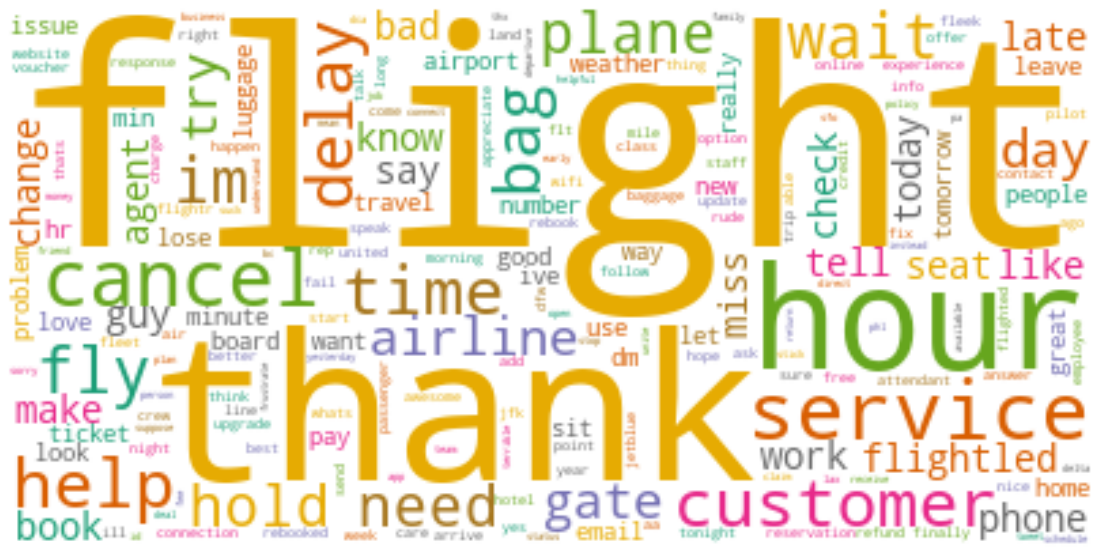

In [15]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]
# generate the word cloud
#for index, ID_SALES in enumerate(data.columns):
wc.generate(' '.join((data_clean_OK.text.values)))

# display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()



In [16]:
#LSA
cv = CountVectorizer(min_df=1, max_df=1,stop_words=stop_words)
data_cv = cv.fit_transform(data_clean_OK.text)

In [17]:
data_cv

<12706x6122 sparse matrix of type '<class 'numpy.int64'>'
	with 6122 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf = vectorizer.fit_transform(data_clean_OK.text)
len(vectorizer.get_feature_names())
data_tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())
data_tfidf.index = data_clean_OK.index
data_tfidf

,aa,aaaand,aaalwayslate,aaba,aacom,aadelay,aadfw,aadv,aadvantage,aafail,...,zip,zkatcher,zombie,zone,zoom,zrh,zrhairport,zukes,zurich,zurichnew
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=30)

svd_model.fit(data_tfidf)

print(svd_model.components_.shape)
print(svd_model.singular_values_)

(30, 10313)
[14.28190272 11.72187998 11.23570255  9.56835487  8.67849053  8.31925558
  8.14439633  8.04678959  7.74635052  7.39237464  7.15180635  7.01792106
  6.91883786  6.79045097  6.61756693  6.61209896  6.44697748  6.33415389
  6.28491546  6.23396879  6.19874858  6.15685579  6.10532477  6.04601451
  6.01415855  5.92073939  5.82697081  5.81290045  5.7513112   5.72105577]


In [20]:
#IDENTIFY TOPICS
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print("%.2f*%s "% (t[1], t[0]) ,end='')
    print("")

Topic 0: 
0.63*flight 0.26*thanks 0.25*cancel 0.20*hour 0.17*flightled 0.15*help 0.15*hold 
Topic 1: 
0.95*thanks 0.04*great 0.03*awesome 0.03*follow 0.03*response 0.03*dm 0.03*reply 
Topic 2: 
0.98*thank 0.06*great 0.05*follow 0.04*appreciate 0.04*dm 0.03*service 0.03*customer 
Topic 3: 
0.39*service 0.38*customer 0.27*hour 0.20*hold 0.19*wait 0.13*help 0.11*time 
Topic 4: 
0.47*service 0.46*customer 0.13*cancel 0.12*flight 0.10*flightled 0.07*airline 0.07*bad 
Topic 5: 
0.41*cancel 0.36*hold 0.36*flightled 0.29*help 0.14*hour 0.10*phone 0.09*need 
Topic 6: 
0.54*dm 0.42*follow 0.27*help 0.21*need 0.18*fleek 0.18*fleet 0.13*send 
Topic 7: 
0.66*fleek 0.65*fleet 0.22*rt 0.06*cancel 0.06*hour 0.06*hold 0.05*flightled 
Topic 8: 
0.45*dm 0.38*follow 0.30*hour 0.21*delay 0.15*service 0.14*customer 0.13*flight 
Topic 9: 
0.35*fly 0.35*time 0.34*cancel 0.32*flightled 0.18*airline 0.16*wait 0.12*bad 
Topic 10: 
0.57*bag 0.23*plane 0.19*flightled 0.19*wait 0.19*cancel 0.17*check 0.14*gate 
Top

In [21]:
#APPLY VADER
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
vader_score = data_clean_OK['text'].apply(lambda text: sid.polarity_scores(text))
vader_score

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


0        {'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'comp...
1        {'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'comp...
2        {'neg': 0.0, 'neu': 0.275, 'pos': 0.725, 'comp...
3        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4        {'neg': 0.51, 'neu': 0.245, 'pos': 0.245, 'com...
                               ...                        
12701    {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...
12702    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
12703    {'neg': 0.438, 'neu': 0.562, 'pos': 0.0, 'comp...
12704    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
12705    {'neg': 0.446, 'neu': 0.462, 'pos': 0.092, 'co...
Name: text, Length: 12706, dtype: object

In [22]:
# DEFINE POLARITY/SUBJECTIVITY
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
data_clean_OK['polarity'] = data_clean_OK['text'].apply(pol)
data_clean_OK['subjectivity'] = data_clean_OK['text'].apply(sub)
data_clean_OK


,ID_SALES,text,polarity,subjectivity
0,HD1927A,lastly company thats try love fly nice persona...,0.380000,0.573333
1,ST4244A,state play hunt destinationdragons ticket left...,0.000000,0.000000
2,HD108A,pleasant flight london charlotte fantastic ama...,0.483333,0.791667
3,HD4335A,tried make transaction offer price id try purc...,0.000000,0.000000
4,HN416A,seriously cat dead im go pissedvery thankful e...,-0.511111,0.688889
...,...,...,...,...
12701,HC3660A,friend tell able use credit airline flight tell,0.500000,0.625000
12702,HD3916A,bit steamed conjunction wmy new wait sit bough...,0.136364,0.454545
12703,HD2061T,nyc flight delay miss connection sacramento ch...,0.000000,0.000000
12704,HS4684T,verify wheelchair assistance request flight,0.000000,0.000000


In [23]:
#DEFINE THRESHOLD FOR TOPICS
topic_array = svd_model.transform(data_tfidf)
topic_array[topic_array>=0.1] = 1
topic_array[topic_array<0.1] = 0
n_topics = 10 
columns_name = [f'TOPIC {i}' for i in range(n_topics)]
df_topics = pd.DataFrame(topic_array[:,:n_topics], index=data_clean_OK.index, columns=columns_name)
df_topics

,TOPIC 0,TOPIC 1,TOPIC 2,TOPIC 3,TOPIC 4,TOPIC 5,TOPIC 6,TOPIC 7,TOPIC 8,TOPIC 9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
12701,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12703,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12704,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_text_topics = data_clean_OK.merge(df_topics, left_index=True, right_index=True)
df_text_topics

,ID_SALES,text,polarity,subjectivity,TOPIC 0,TOPIC 1,TOPIC 2,TOPIC 3,TOPIC 4,TOPIC 5,TOPIC 6,TOPIC 7,TOPIC 8,TOPIC 9
0,HD1927A,lastly company thats try love fly nice persona...,0.380000,0.573333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ST4244A,state play hunt destinationdragons ticket left...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,HD108A,pleasant flight london charlotte fantastic ama...,0.483333,0.791667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,HD4335A,tried make transaction offer price id try purc...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HN416A,seriously cat dead im go pissedvery thankful e...,-0.511111,0.688889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12701,HC3660A,friend tell able use credit airline flight tell,0.500000,0.625000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12702,HD3916A,bit steamed conjunction wmy new wait sit bough...,0.136364,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12703,HD2061T,nyc flight delay miss connection sacramento ch...,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12704,HS4684T,verify wheelchair assistance request flight,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#AGGREGATED DATA (max, min, count and mean of subjectivity and polarity for each id)
aggregate_result_pol = data_clean_OK.groupby('ID_SALES').agg({'polarity': ['mean', 'min', 'max', 'count']}) 
aggregate_result_sub = data_clean_OK.groupby('ID_SALES').agg({'subjectivity': ['mean', 'min', 'max', 'count']}) 
merge_df=pd.merge(left=aggregate_result_pol, right=aggregate_result_sub, on='ID_SALES')
merge_df

polarity                 subjectivity                     
              mean  min  max count         mean       min  max count
ID_SALES                                                            
CC1387A   0.766667  0.3  1.0     3     0.829167  0.487500  1.0     3
CC139A    0.000000  0.0  0.0     3     0.000000  0.000000  0.0     3
CC1701A   1.000000  1.0  1.0     3     0.533333  0.300000  1.0     3
CC1773A   1.000000  1.0  1.0     3     1.000000  1.000000  1.0     3
CC1830A   0.000000  0.0  0.0     3     0.000000  0.000000  0.0     3
...            ...  ...  ...   ...          ...       ...  ...   ...
ST60A    -1.000000 -1.0 -1.0     3     1.000000  1.000000  1.0     3
ST809A    0.266667  0.0  0.8     3     0.300000  0.000000  0.9     3
ST925A   -0.933333 -1.0 -0.8     3     1.000000  1.000000  1.0     3
ST928A    0.000000  0.0  0.0     3     0.200000  0.000000  0.6     3
ST960A   -0.804762 -1.0 -0.7     3     0.841270  0.666667  1.0     3

[4148 rows x 8 columns]

In [26]:
#merge between sales dataset and twitter dataset
merge_sales=pd.merge(left=df_text_topics, right=sales.Retained, left_on=df_text_topics.ID_SALES, right_index=True)
merge_sales.drop(columns=['key_0'], inplace=True)
merge_sales

,ID_SALES,text,polarity,subjectivity,TOPIC 0,TOPIC 1,TOPIC 2,TOPIC 3,TOPIC 4,TOPIC 5,TOPIC 6,TOPIC 7,TOPIC 8,TOPIC 9,Retained
0,HD1927A,lastly company thats try love fly nice persona...,0.38,0.573333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1748,HD1927A,offer real food american club like amaze food ...,0.10,0.150000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6752,HD1927A,dm send thanks respond response timely miss,0.20,0.200000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,ST4244A,state play hunt destinationdragons ticket left...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2943,ST4244A,reinstate cancel flighted flight,0.00,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11664,SK4426A,unpleasant experience phone agent cancel fligh...,-0.65,0.950000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
11917,SK4426A,hotel work folder business casual clothes bad,-0.60,0.766667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
12263,HD4957A,sign bonus enroll elevate,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
12443,HD4957A,laxnycarea possible,0.00,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [27]:
#save DB
merge_sales.to_csv('twitter_sales.csv', index=False)

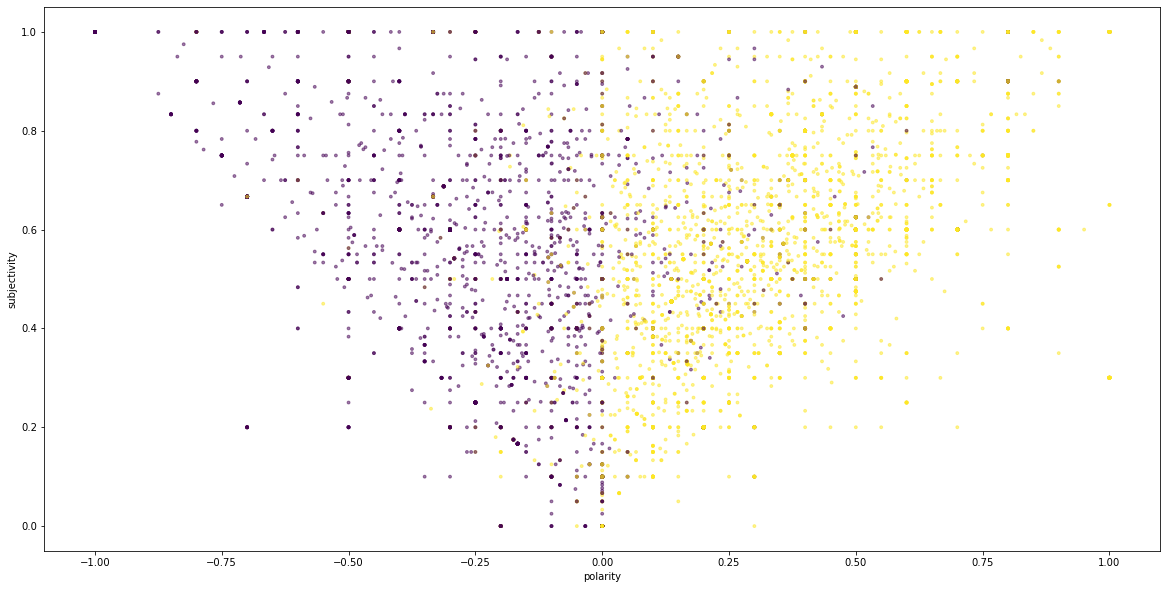

In [30]:
plt.scatter(merge_sales.polarity, merge_sales.subjectivity, alpha=.5,
           s = 8,
           c=merge_sales.Retained);
plt.xlabel("polarity")
plt.ylabel("subjectivity")
plt.show()

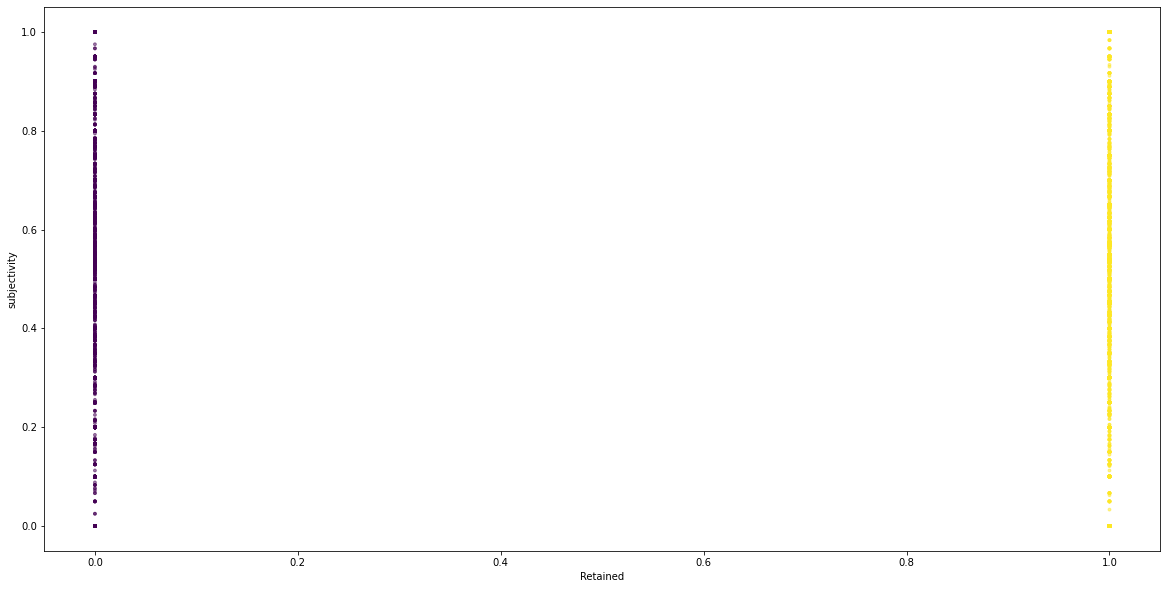

In [35]:
plt.scatter(merge_sales.Retained, merge_sales.subjectivity, alpha=.5,
           s = 8,
           c=merge_sales.Retained);
plt.xlabel("Retained")
plt.ylabel("subjectivity")
plt.show()

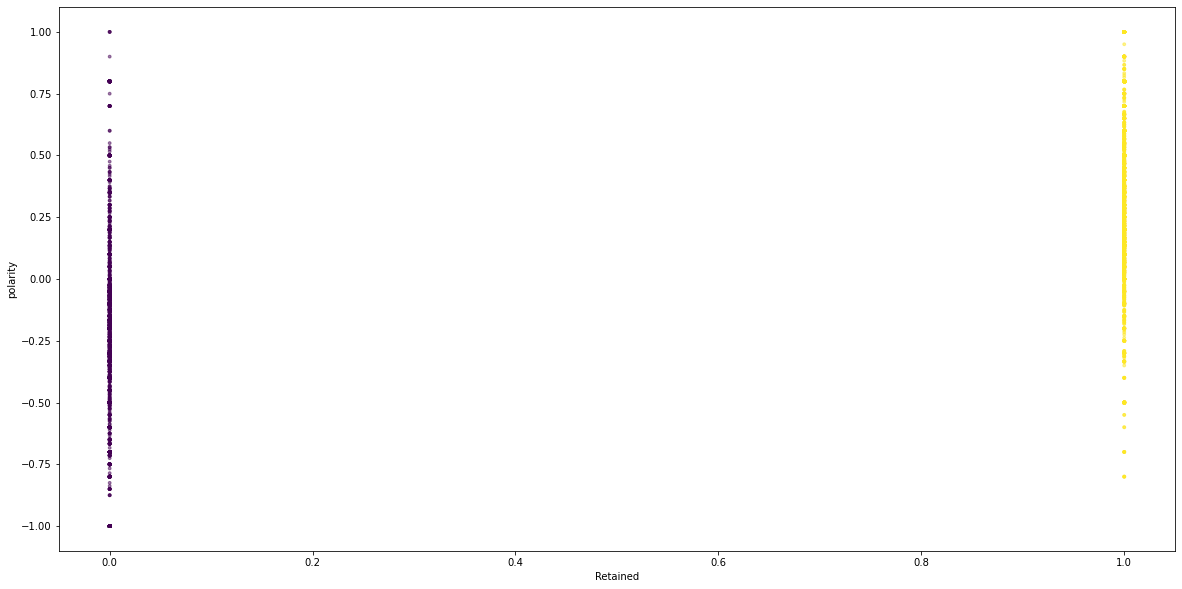

In [34]:
plt.scatter(merge_sales.Retained, merge_sales.polarity, alpha=.5,
           s = 8,
           c=merge_sales.Retained);
plt.xlabel("Retained")
plt.ylabel("polarity")
plt.show()

<AxesSubplot:title={'center':'polarity'}, xlabel='Retained'>

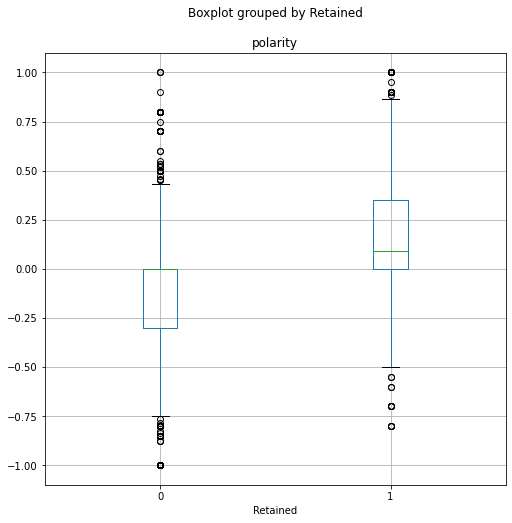

In [38]:
merge_sales.boxplot(by='Retained', column='polarity', figsize=(8,8))

<AxesSubplot:title={'center':'subjectivity'}, xlabel='Retained'>

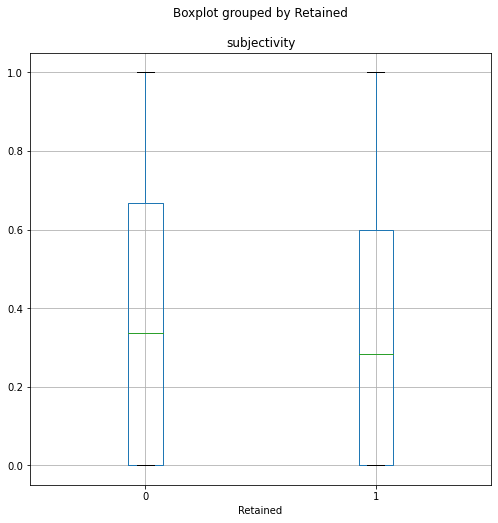

In [39]:
merge_sales.boxplot(by='Retained', column='subjectivity', figsize=(8,8))

<AxesSubplot:title={'center':'subjectivity'}, xlabel='TOPIC 1'>

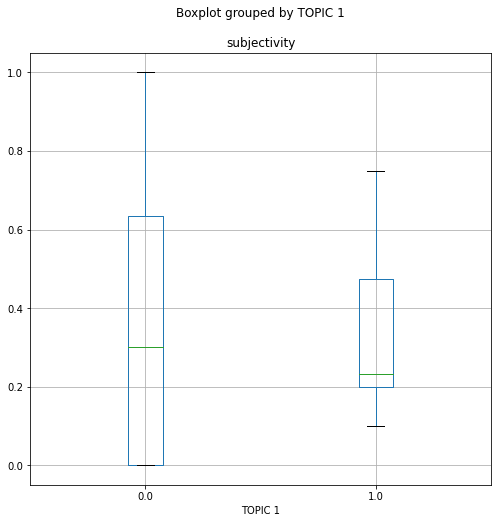

In [40]:
merge_sales.boxplot(by='TOPIC 1', column='subjectivity', figsize=(8,8))

<AxesSubplot:title={'center':'polarity'}, xlabel='TOPIC 1'>

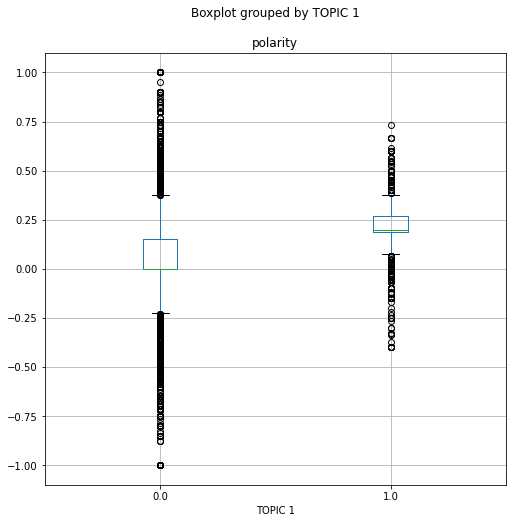

In [41]:
merge_sales.boxplot(by='TOPIC 1', column='polarity', figsize=(8,8))